In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import cv2

In [10]:
image = cv2.imread('bike-lanes.jpg')

cv2.imshow(" ", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
image.shape

(359, 479, 3)

In [6]:
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

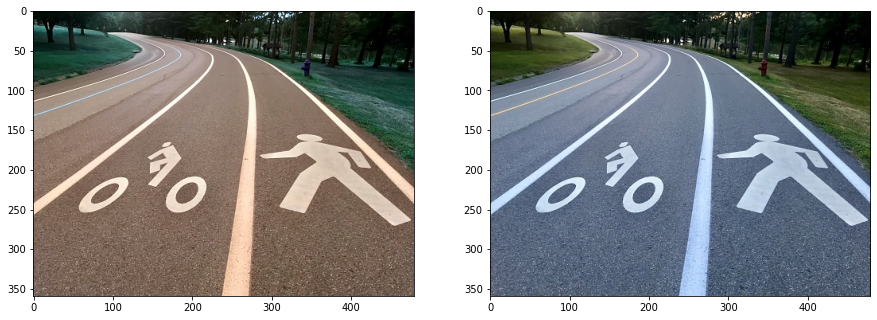

In [7]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(RGB_img)

In [8]:
image = np.flip(image, axis=-1)

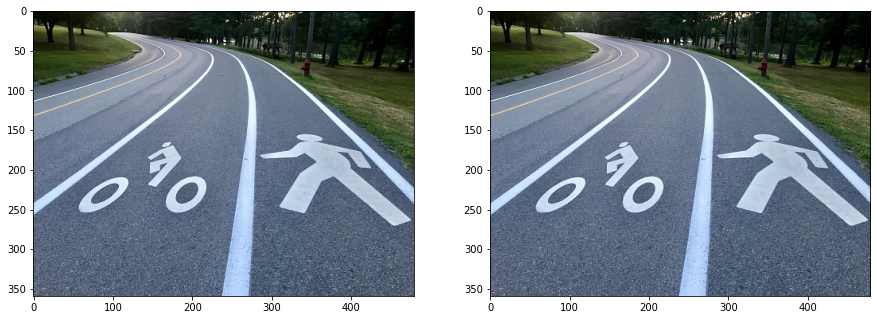

In [9]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(RGB_img)

(359, 479)

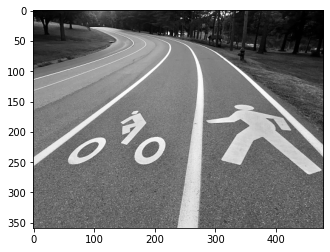

In [11]:
image_g = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image_g, cmap = "gray")
image_g.shape

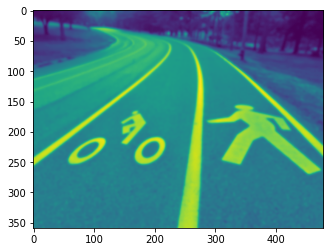

In [69]:
blurred = cv2.GaussianBlur(image_g, (9,9), 0)
plt.imshow(blurred)

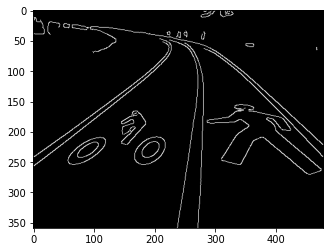

In [70]:
threshold_low = 10
threshold_high = 200

image_canny = cv2.Canny( blurred, threshold_low, threshold_high)
plt.imshow(image_canny, cmap="gray")

### Region of Interest (ROI)

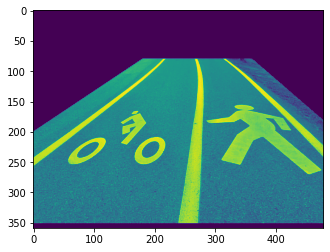

In [71]:
vertices = np.array([[(0, 200), (180, 80), (360, 80), (500, 200), (500, 350), (0, 350)]], dtype= np.int32)

mask = np.zeros_like(image_g)
cv2.fillPoly(mask, vertices, 255)
masked_image = cv2.bitwise_and(image_g, mask)
plt.figure()
plt.imshow(masked_image)

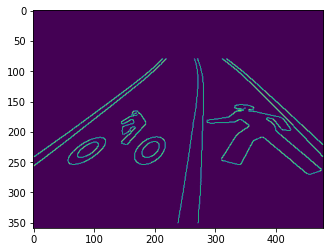

In [72]:
masked_image = cv2.bitwise_and(image_canny, mask)
plt.figure()
plt.imshow(masked_image)

In [94]:
rho = 1                               # distance resolution in pixels of the Hough grid
theta = np.pi/180                     # angular resolution in radians of the Hough grid
threshold = 100                       # minimum number of votes (intersections in Hough grid cell)
min_line_len = 110                    # minimum number of pixels making up a line
max_line_gap = 15                     # maximum gap in pixels between connectable line segments

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP( masked_image, rho, theta, threshold, np.array([]), 
                       minLineLength = min_line_len, maxLineGap = max_line_gap)
                                      

line_image = np.zeros((masked_image.shape[0], masked_image.shape[1], 3), dtype= np.uint8)

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1,y1), (x2,y2), [255,0,0], 20)
        
lines

array([[[  2, 256, 176, 120]],

       [[  2, 241, 160, 126]],

       [[238, 350, 269, 151]],

       [[274, 319, 280, 139]],

       [[331,  89, 478, 221]],

       [[ 42, 213, 197,  96]]], dtype=int32)

#####  Resultant weighted image is calculated as follows: original_img * α + img * β + γ

In [99]:
α = 1
β = 1
γ = 0    

Image_with_lines = cv2.addWeighted(image, α, line_image, β, γ)

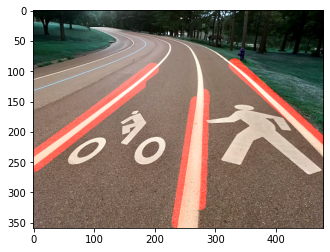

In [100]:
plt.figure()
plt.imshow(Image_with_lines)